![](http:images.pexels.com/photos/3683041/pexels-photo-3683041.jpeg?auto=compress&cs=tinysrgb&w=600)

In [1]:
# Import the standard libraries for the data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data set using the pandas read function
data=pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
# Checking the data shape
data.shape

(10000, 15)

In [4]:
#Checking the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [5]:
# Null values checking
data.isna().sum()/len(data)*100

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [6]:
# Duplicat values check
Checking_duplicate_values=data.duplicated().sum()
print(f'The data set contains the {Checking_duplicate_values} values')

The data set contains the 0 values


In [7]:
# Checking the some stastical information in the data
data.describe().style.background_gradient(cmap='RdYlBu')

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


## Observations 
* The data contains 10000 rows and 15 columns
* There is no null and duplicate values in the data
* In the age column minimum age is 18 and maximum goes to 85

## Explore Data Analysis Process

## Questions asked from the data 
* Create a pie chart to represent the percentage distribution of each blood group in the dataset.
* Generate a bar graph to highlight the top 10 regular customers based on relevant criteria in the dataset.
* Utilize a bar graph to identify and visualize the busiest doctor within the dataset.
* Create pie charts to illustrate the percentage distribution of genders in the dataset.
* Generate a visualization, possibly a histogram or another suitable chart, to represent the distribution of age values in the dataset.

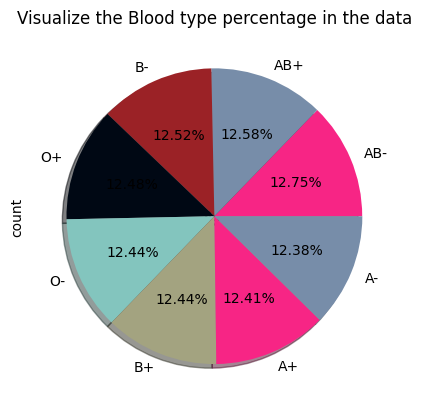

In [8]:
# Checking the blodd percentage in the  data set
data['Blood Type'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
     title="Visualize the Blood type percentage in the data",
      explode=[0,0,0,0,0,0,0,0.001],
      labels=['AB-','AB+','B-','O+','O-','B+','A+','A-'], 
      colors=['#f72585','#778da9','#9b2226','#000814','#83c5be','#a3a380'], 
      autopct='%1.2f%%',
      pctdistance=0.6, 
      shadow=True)
plt.show()

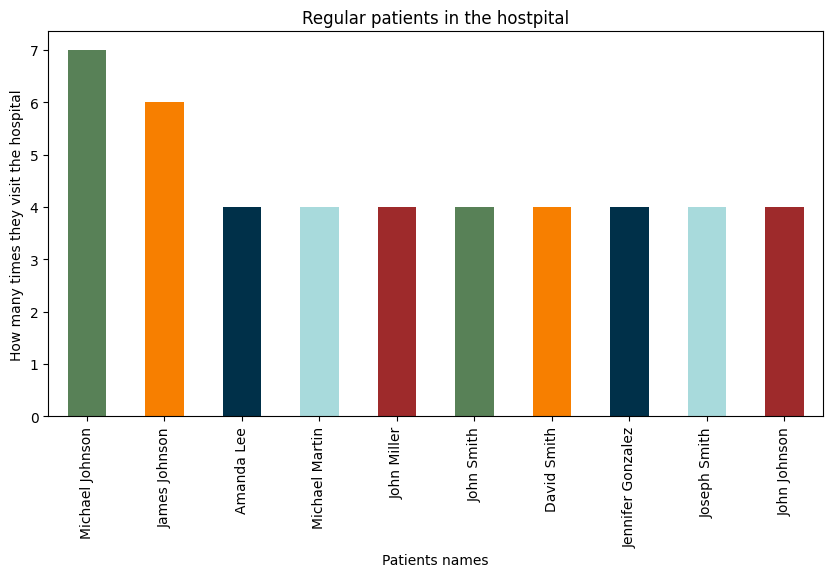

In [9]:
# Checking the regular customers
data['Name'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,5),title="Regular patients in the hostpital",color=['#588157','#f77f00','#003049','#a8dadc','#9e2a2b'])
plt.xlabel("Patients names")
plt.ylabel("How many times they visit the hospital")
plt.show()

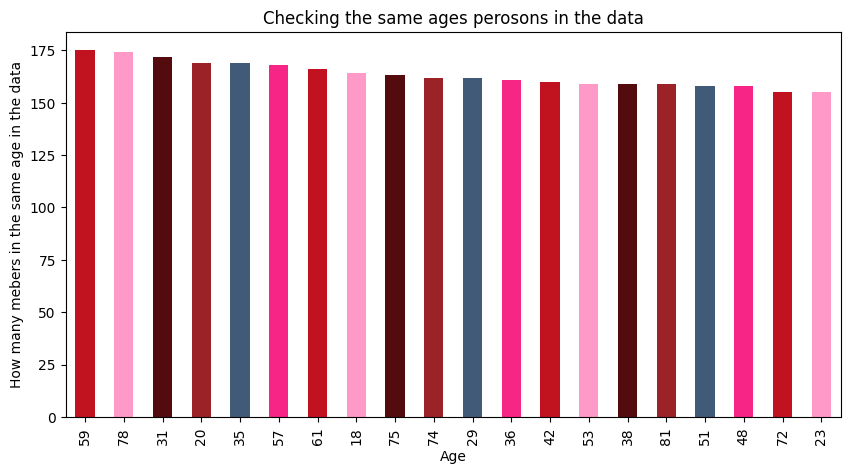

In [10]:
# Checking the same age people
colors_values=['#c1121f','#ff99c8','#540b0e','#9b2226','#415a77','#f72585']
data['Age'].value_counts().sort_values(ascending=False).head(20)\
.plot(kind='bar',figsize=(10,5),color=colors_values,title="Checking the same ages perosons in the data")
plt.xlabel("Age")
plt.ylabel("How many mebers in the same age in the data")
plt.show()

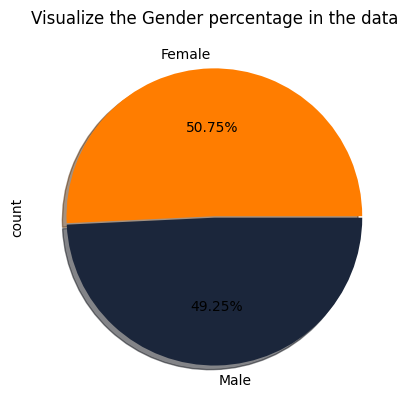

In [11]:
# Find the Gender percentage in the data set
data['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',title="Visualize the Gender percentage in the data",
      explode=[0,0.01],
      labels=['Female','Male'], 
      colors=['#ff7d00','#1b263b'], 
      autopct='%1.2f%%',
      shadow=True)
plt.show()

## Observations: 
* AB- is the leading blood group in the dataset, followed by AB+.

* Michel Janson and James Janson are the top patients, each having visited the hospital 6 times.

* People aged 59 and 79 tend to be the most frequent visitors to the hospital.

* The female gender dominates in the dataset.

## Again questions asked from the data.
* Generate a chart to illustrate the medications used for various medical conditions in the dataset.
* Determine and visualize the day on which most patients are admitted using appropriate charts or graphs. 
* Identify and display the top 10 hospitals with the highest charges paid by patients.
* Determine the doctor who earns the most and visualize this information.
* Explore and analyze the relationship between medical conditions and admission types, presenting the findings visually.

In [12]:
# Which medication used different medical conditions 
data.groupby('Medical Condition')['Medication'].value_counts().sort_values(ascending=False)\
.unstack().style.background_gradient(cmap='GnBu_r')

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Medical Condition,,,,,
Arthritis,322,320,318,324,366
Asthma,370,340,346,310,342
Cancer,291,352,350,346,364
Diabetes,335,301,326,327,334
Hypertension,328,335,356,323,346
Obesity,322,328,319,332,327


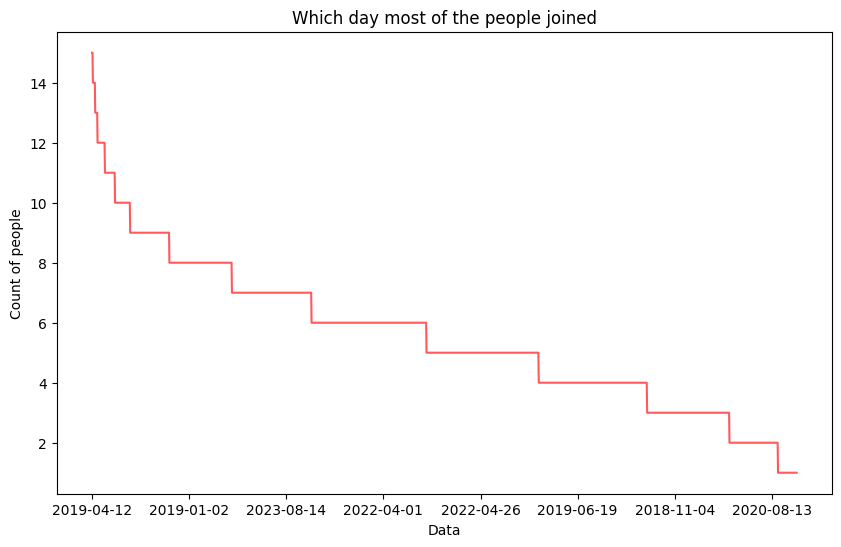

In [13]:
# Find the which date most of the people joined
data['Date of Admission'].value_counts().sort_values(ascending=False)\
.plot(kind='line',figsize=(10,6),title="Which day most of the people joined",color=['#ff595e'])
plt.xlabel("Data")
plt.ylabel("Count of people")
plt.show()

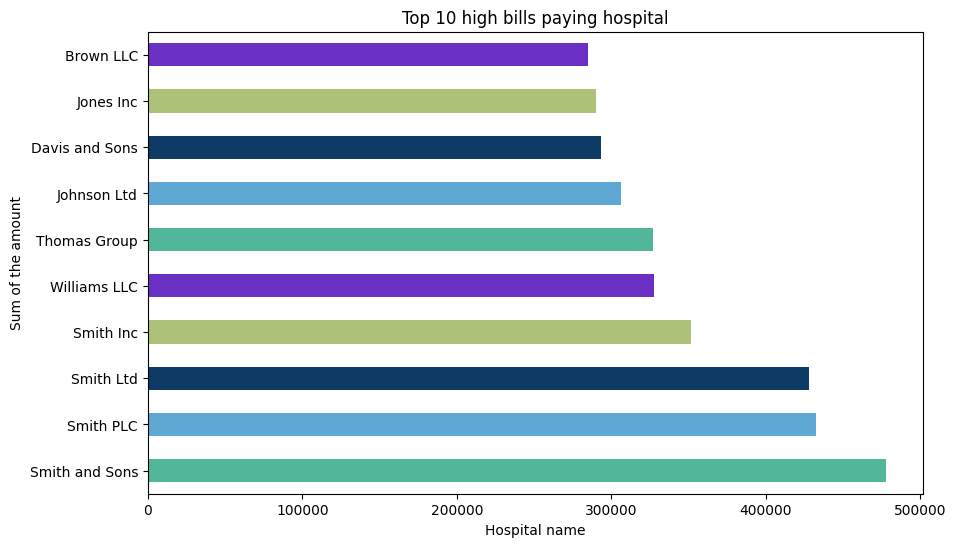

In [14]:
# Top 10 hight fees colleting hosptial
data.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)\
.plot(kind='barh',figsize=(10,6),color=['#52b69a','#5fa8d3','#0d3b66','#adc178','#6930c3'])
plt.title("Top 10 high bills paying hospital")
plt.xlabel("Hospital name")
plt.ylabel("Sum of the amount")
plt.show()

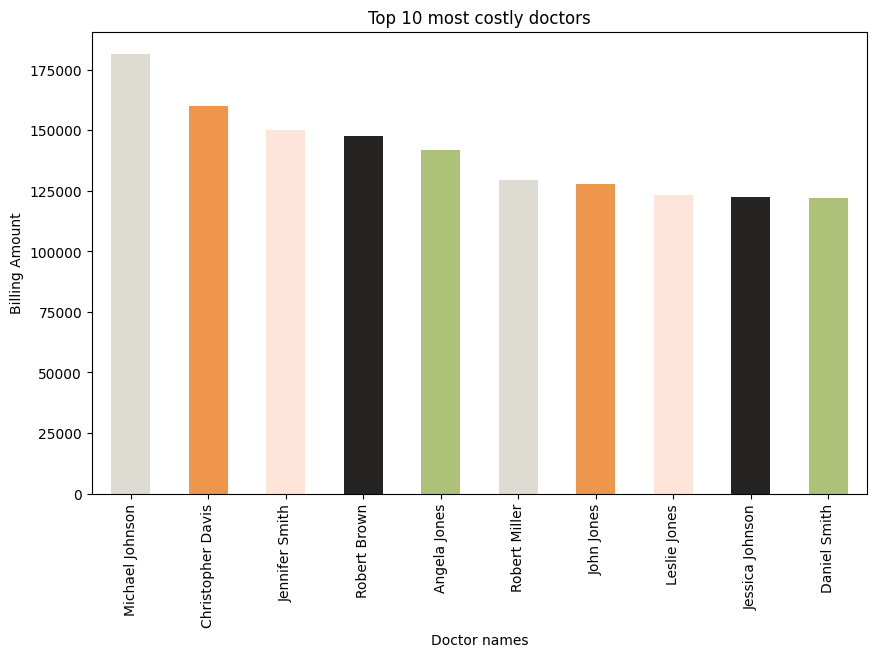

In [15]:
# Find the which doctor mostly earn 
data.groupby('Doctor')['Billing Amount'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,6),title="Top 10 most costly doctors",color=['#dedbd2','#ee964b','#ffe5d9','#252422','#adc178'])
plt.xlabel('Doctor names')
plt.ylabel('Billing Amount')
plt.show()

In [16]:
# Find the admision type with different madical condition 
data.groupby('Medical Condition')['Admission Type'].value_counts()\
.unstack().style.background_gradient(cmap='seismic_r')

Admission Type,Elective,Emergency,Urgent
Medical Condition,,,
Arthritis,569,529,552
Asthma,570,556,582
Cancer,555,578,570
Diabetes,528,557,538
Hypertension,515,578,595
Obesity,505,569,554


## Observations:
* For arthritis conditions, Penicillin medication is used, while for asthma, aspirin is prescribed.
* On April 12, 2019, most patients joined hospitals.
* Smith and Sons charge high amounts for their patients.

* Michel Janson is the highest-earning doctor in the dataset.

*Also, visualize the medical conditions with admission types.

In [17]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive


In [18]:
# Let's find the average amount for the gender with billing amount
pd.DataFrame(data.groupby('Gender')['Billing Amount'].mean().sort_values(ascending=False)).style.background_gradient(cmap='mako_r')

,Billing Amount
Gender,
Male,25550.215933
Female,25484.385085


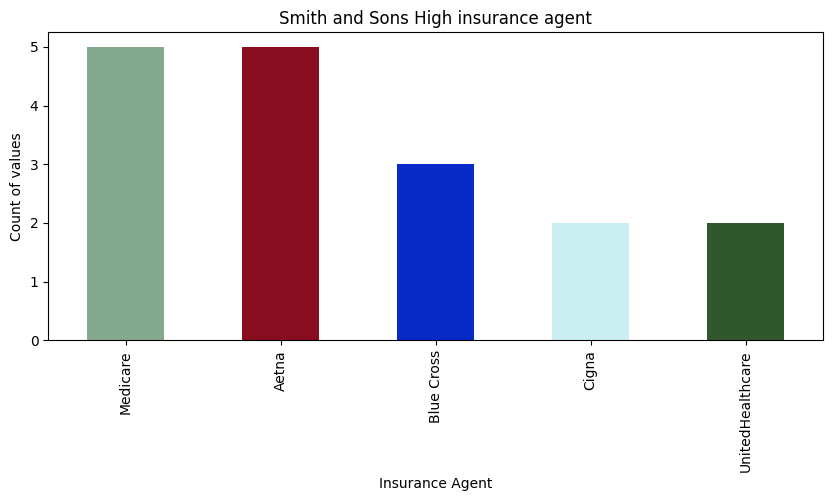

In [19]:
# Find the smit and sons hospital insuarance providers 
data.groupby('Hospital')['Insurance Provider'].value_counts().loc['Smith and Sons']\
.plot(kind='bar',title="Smith and Sons High insurance agent",figsize=(10,4),color=['#84a98c','#880d1e','#072ac8','#cbeef3','#31572c'])
plt.xlabel("Insurance Agent")
plt.ylabel("Count of values")
plt.show()

<Axes: title={'center': 'Visualize the diabetes  with insurance provider percentage in the data'}, ylabel='count'>

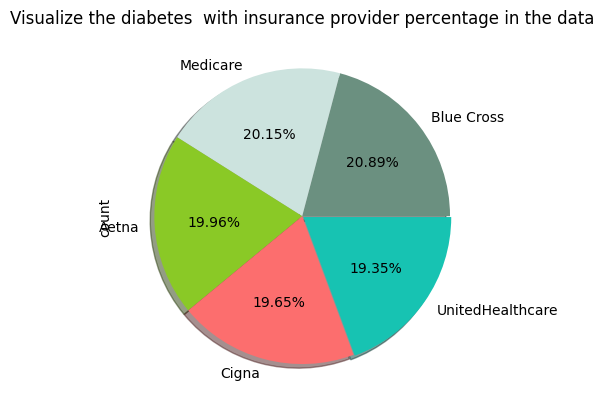

In [20]:
# Find the which insurace are providing insurance for diabetes
diabetes=data['Medical Condition']=='Diabetes'
data.loc[diabetes]['Insurance Provider'].value_counts()\
.plot(kind='pie',
     title="Visualize the diabetes  with insurance provider percentage in the data",
      explode=[0,0,0,0,0.01],
      labels=['Blue Cross','Medicare','Aetna','Cigna','UnitedHealthcare'], 
      colors=['#6b9080','#cce3de','#8ac926','#fc6e6e','#17c3b2'], 
      autopct='%1.2f%%',
      shadow=True)

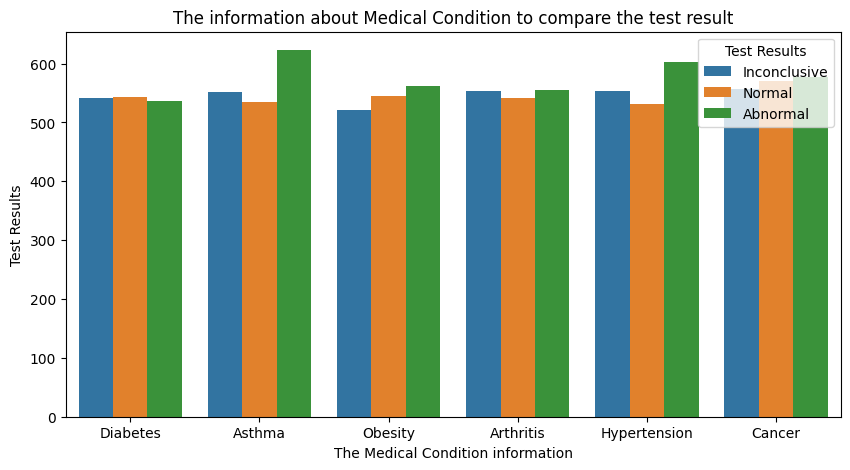

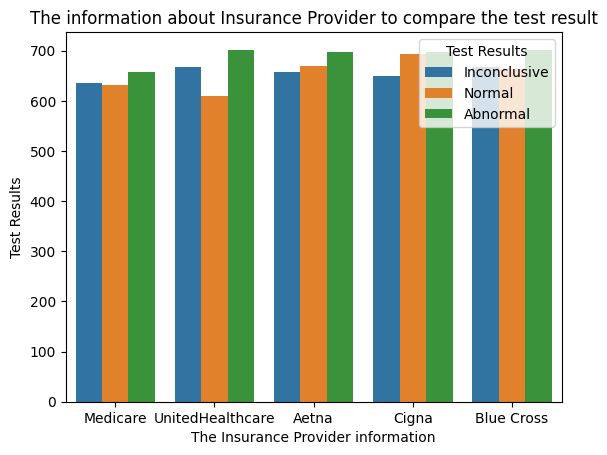

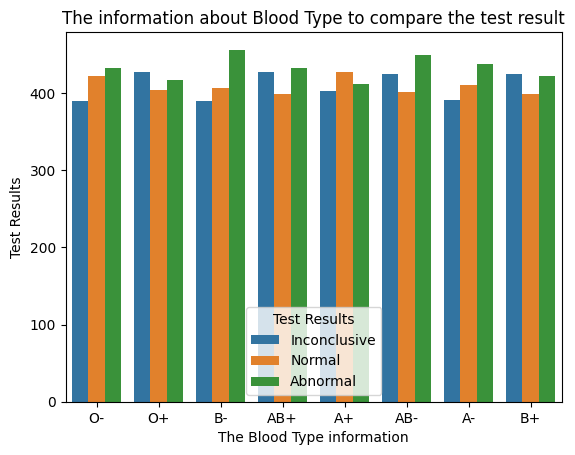

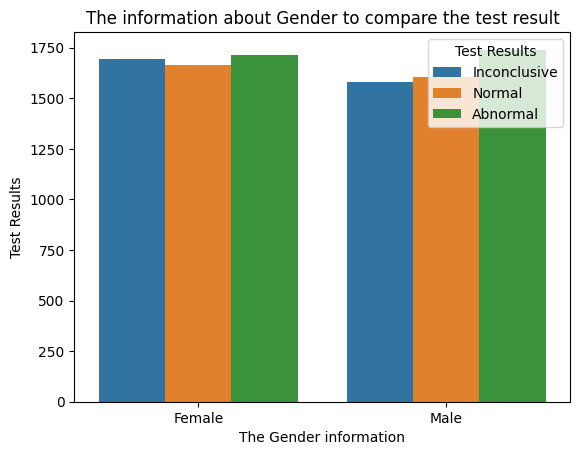

In [21]:
# To visualize the 
plt.figure(figsize=(10,5))
for i in ['Medical Condition','Insurance Provider','Blood Type','Gender']:
    sns.countplot(data=data,x=i,hue='Test Results',palette='tab10')
    plt.title(f'The information about {i} to compare the test result')
    plt.xlabel(f'The {i} information')
    plt.ylabel('Test Results')
    plt.show()

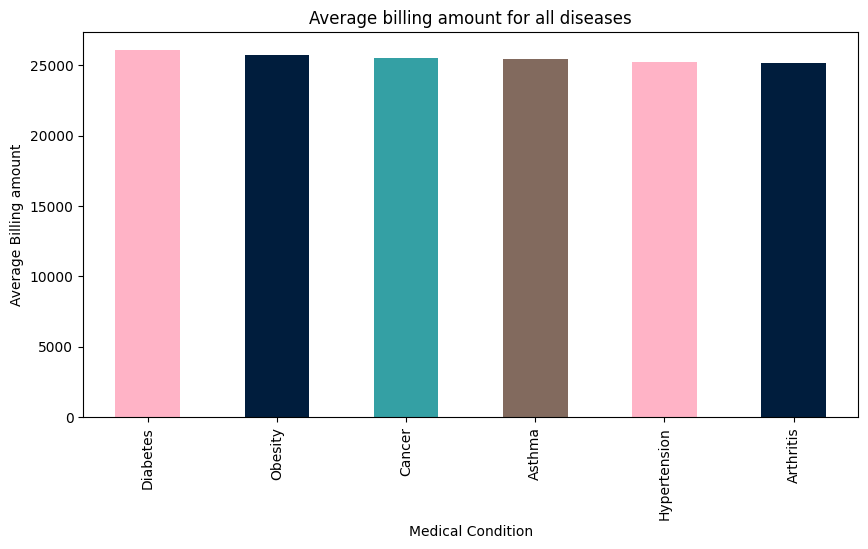

In [22]:
# Find the average billing amount for the each desies
data.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average billing amount for all diseases",figsize=(10,5),color=['#ffb3c6','#001d3d','#34a0a4','#826a5e'])
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing amount")
plt.show()